# 4. 什么是ARIMA模型？


## 目录
1. 什么是AR模型？
2. 什么是MA模型？
3. 什么是ARIMA模型？
4. 如何用ARIMA建模？

## 什么是AR模型？
AR模型，也就是自回归。
自回归很容易理解，也就是自己对自己以前的值做回归。最简单的AR(1),也就是自己对自己上一个时间点的值做回归。$\epsilon_t$为误差项。

AR(1): 

$X_t=\beta_1 X_{t-1}+\epsilon_t$


AR(2): 

$X_t=\beta_1 X_{t-1}+\beta_2 X_{t-2}+\epsilon_t$


AR(p): 

$X_t=\beta_1 X_{t-1}+\beta_2 X_{t-2}+...\beta_p X_{t-p}+\epsilon_t$


下面我们模拟一段AR(1)的序列,我们设定$\beta$为-0.5、0.1、0.4、0.9。

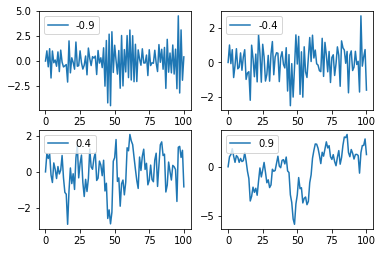

In [1]:
import numpy as np
import matplotlib.pyplot as plt
e=np.random.normal(0, 1, 100)
beta=[-0.9, -0.4, 0.4, 0.9]
for n, j in enumerate(beta):
    ar1=np.zeros(101)
    ax=plt.subplot(2, 2, n+1)
    for i in np.arange(100):
        ar1[i+1]=j*ar1[i]+e[i]
    ax.plot(ar1, label=j)
    plt.legend(loc='upper left')
plt.show()

简单地看一下AR(1)的一些数学计算。
自协方差与自相关系数：
$$cov(Y_t, Y_t)= \gamma_0= \sigma^2  $$

$$cov(Y_t, Y_{t−1})  = \gamma_1= \sigma^2\beta_1$$

$$corr(Y_t, Y_{t−1}) = \rho_1 = \frac{\gamma_1}{\sigma^2} = \beta_1$$

$$cov(Y_t, Y_{t−j}) = \gamma_j = \sigma^2\beta_1^j$$

$$corr(Y_t, Y_{t−j}) = \rho_j = \frac {\gamma_j}{\sigma^2} = \beta_1^j$$

$$\text{Since }|\beta_1| < 1$$

$$\lim_{j→∞}\rho_j = \beta_1^j = 0$$

如果$\beta$在-1和1之间，那么这个序列就是平稳的，因为相关性会递减。我们熟悉的随机漫步就是一个AR(1)模型，但是是不平稳的，因为$\beta$等于1，也就是意味着$t_1$时刻的影响永远不会消失。如果$\beta$的绝对值大于1，那么$t_1$时刻的影响不仅不会消失还会爆炸，来看一个例子。

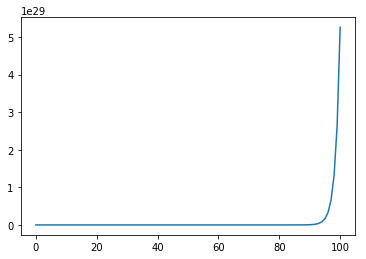

In [5]:
e=np.random.normal(0,1,100)
beta=2
ar1=np.zeros(101)
for i in np.arange(100):
    ar1[i+1]=beta*ar1[i]+e[i]
plt.plot(ar1)
plt.show()

## 什么是MA模型？
MA(1)
$$X_t=\epsilon_t+\theta_1\epsilon_{t-1}$$

MA(p)
$$X_t=\epsilon_t+\theta_1\epsilon_{t-1}+...+\theta_p\epsilon_{t-p}$$

MA(1)方差：

$$var(Y_t) = \sigma^2 = E[(Y_t − μ)^2]$$

$$= E[(\epsilon_t + \theta\epsilon_{t−1})^2]$$

$$= E[\epsilon^2_t] + 2\theta E[\epsilon_t\epsilon_{t−1}] + \theta^2E[\epsilon^2_{t−1}]$$

$$= \sigma^2_\epsilon +0+\theta^2\sigma^2_\epsilon = \sigma^2_\epsilon(1+\theta^2)$$

协方差：
$$cov(Y_t, Y_{t−1}) = \gamma_1 = E[(\epsilon_t + \theta\epsilon_{t−1})(\epsilon_{t−1} + \theta\epsilon_{t−2})]$$

$$= E[\epsilon_t\epsilon_{t−1}] + \theta E[\epsilon_t\epsilon_{t−2}]+ θE[\epsilon^2_{t−1}] + \theta^2 E[\epsilon_{t−1}\epsilon_{t−2}]$$

$$= 0+0+\theta \sigma^2_\epsilon + 0 = \theta \sigma^2_\epsilon$$

自相关系数：

$$\rho_1 =\frac{\gamma_1}{\sigma^2} =\frac {\theta\sigma^2_\epsilon}{\sigma^2_\epsilon(1 + \theta^2)}=\theta(1 + \theta^2)$$

$$\rho_j =\gamma_j\sigma^2 = 0 \text{ for } j > 1$$




#### 重点：
$$ρ_1 = 0 \text{ if } θ = 0$$

$$ρ_1 > 0 \text{ if } θ > 0$$

$$ρ_1 < 0 \text{ if } θ < 0$$

我们模拟一段MA(1)的数据。令$\theta$为-0.5、0.1、0.4、0.9。

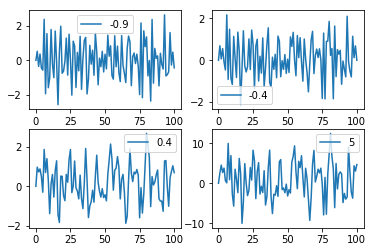

In [6]:
import numpy as np
import matplotlib.pyplot as plt

e = np.random.normal(0,1,100)
theta = [-0.9, -0.4, 0.4, 5]
for n, j in enumerate(theta):
    ma1=np.zeros(101)
    ax=plt.subplot(2, 2, n+1)
    for i in np.arange(100):
        ma1[i+1] = j*e[i-1]+e[i]
    ax.plot(ma1, label=j)
    plt.legend()
plt.show()

## 什么是ARIMA模型？
ARMA模型其实就是将AR和MA模型结合起来。看一个ARMA(1,1)模型好了。
$$X_t=\beta_1 X_{t-1}+\epsilon_t+\theta_1\epsilon_{t-1}$$
所以其实AR和MA都只是特殊情况的ARMA。那么ARIMA又是什么？比如ARIMA(1,1,1)模型，I的阶数是1，代表这个序列是**I(1)**,需要差分一次。当然你也可以先把序列处理成平稳的，然后直接用ARMA。
那么为了确定模型的阶数，我们引入ACF和PACF函数。
ACF就是autocorrelation function。什么意思呢？举个例子，$X_t$和$X_{t-1}$的correlation的值就是一阶ACF的值，$X_t$和$X_{t-p}$的相关系数的值就是p阶ACF的值。
PACF就是partial autocorrelation function。以上面AR(p)为例子,一阶PACF的值就是$\beta_1$,p阶PACF的值就是$\beta_p$。 
略过中间的推导，我们直接给出结论。AR(p)模型的PACF是p阶截尾的，MA(p)模型的ACF是p阶截尾的。  ARMA模型则ACF和PACF都是拖尾的。继续拿股票数据做一个例子。

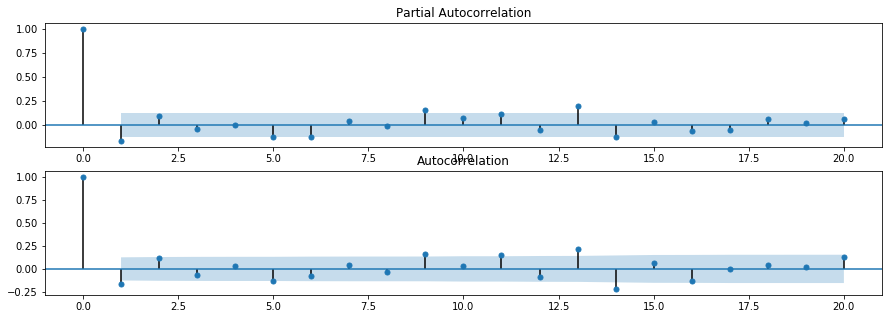

In [7]:
import statsmodels.api as sm
import tushare as ts
import pandas as pd
import matplotlib.pyplot as plt


data=ts.get_k_data('000001', start='2016-01-01', end='2016-12-31', ktype='D',autype='qfq')
data.index = pd.to_datetime(data['date'],format='%Y-%m-%d')

data=data['close'].diff()[1:]
fig = plt.figure(figsize=(15,5))
ax1=fig.add_subplot(211)
ax2=fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data,lags=20,ax=ax1)
fig = sm.graphics.tsa.plot_acf(data,lags=20,ax=ax2)
plt.show()

|模型|ACF|PACF|
|:---:|:---:|:---:|
|AR(p)|拖尾|p阶截尾|
|MA(q)|q阶截尾|拖尾|
|ARMA(p,q)|拖尾|拖尾|


因为序列不平稳所以ACF没有衰减的趋势，可以很明显看到PACF是一阶截尾的。但是如果你用AR(1)建模会出现问题，因为序列不平稳。所以应该对差分后序列或者是收益率建模。但是发现差分后从图中依然不好确定阶数。

这里我们就会用信息准则法定阶，而个人更加推荐这种方法。
常用的有AIC/BIC/，当然还有很多别的。

In [8]:
# order=sm.tsa.arma_order_select_ic(data.diff()[1:],max_ar=5,max_ma=5, ic='bic')['bic_min_order']
# order=sm.tsa.arma_order_select_ic(data.diff()[1:],max_ar=5,max_ma=4,ic='aic')['aic_min_order']
# order = sm.tsa.arma_order_select_ic(data,max_ar=5,max_ma=4,ic='hqic')['hqic_min_order'] # HQIC
train=data.diff()[1:-10]
# print train

Model = sm.tsa.ARMA(train, order=(2,3))
arma = Model.fit(trend='nc', disp=-1)
arma.summary()

D:\ProgramData\Anaconda2\lib\site-packages\statsmodels\base\model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
D:\ProgramData\Anaconda2\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  close   No. Observations:                  232
Model:                     ARMA(2, 3)   Log Likelihood                 206.512
Method:                       css-mle   S.D. of innovations              0.098
Date:                Thu, 18 May 2017   AIC                           -401.025
Time:                        16:21:51   BIC                           -380.344
Sample:                    01-06-2016   HQIC                          -392.685
                         - 12-16-2016                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
ar.L1.close    -1.9161      0.035    -55.219      0.000      -1.984      -1.848
ar.L2.close    -0.9701      0.032    -30.224      0.000      -1.033      -0.907
ma.L1.close     0.8393      0.074     11.271      0.000       0.693       0.985
ma.L2.close    -0.9613      0.066    -14.500      0.000      -1.091      -0.831
ma.L3.close    -0.8778      0.069    -12.737      0.000      -1.013      -0.743
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9876           -0.2357j            1.0153           -0.4627
AR.2           -0.9876           +0.2357j            1.0153            0.4627
MA.1            1.0001           -0.0000j            1.0001           -0.0000
MA.2           -1.0476           -0.2041j            1.0673           -0.4694
MA.3           -1.0476           +0.2041j            1.0673            0.4694
-----------------------------------------------------------------------------
"""

#### 计算模型得分
模型得分越接近1越好，以下结果为0.58。

In [9]:
delta = arma.fittedvalues - train
score = 1 - delta.var()/train.var()
print score

0.58016828658


In [10]:
Y = data.diff()[-10:]
predict = arma.predict(start=(len(data.diff()[1:])-11),end=len(data.diff()[1:]),dynamic=True)[-10:]

predict.index = Y.index
chart = pd.concat([predict,Y], axis=1, keys=['predict', 'actual'])
print chart

             predict  actual
date                        
2016-12-19  0.047925   -0.05
2016-12-20 -0.042729   -0.04
2016-12-21  0.035379    0.14
2016-12-22 -0.026338   -0.07
2016-12-23  0.016144   -0.04
2016-12-26 -0.005383    0.10
2016-12-27 -0.005347   -0.08
2016-12-28  0.015467    0.02
2016-12-29 -0.024449    0.04
2016-12-30  0.031841    0.00


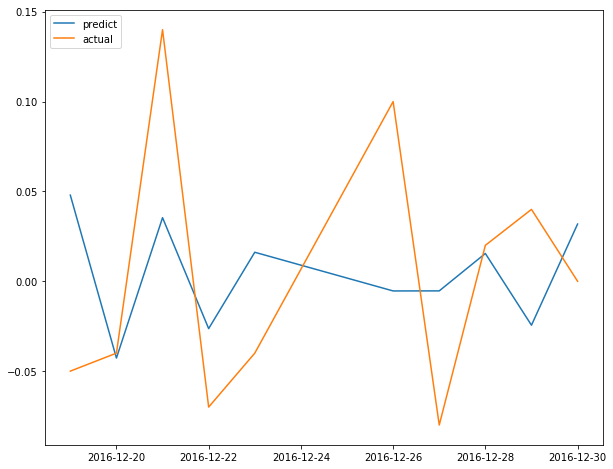

In [96]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,8))
ax.plot(chart.predict, label='predict')
ax.plot(chart.actual, label='actual')
ax.legend(loc='upper left')
plt.show()

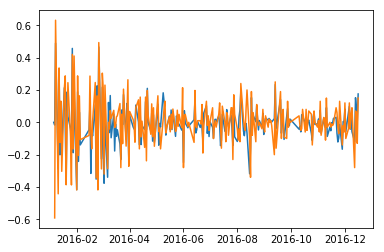

In [15]:
plt.plot(arma.fittedvalues)
plt.plot(train[1:])
plt.show()

## 作业
根据ARIMA模型对其他股票收益率做预测。